In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers ,models
import matplotlib.pyplot as plt
import numpy as np

In [40]:
## Load database
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [19]:
## Flattening Y_train
y_train = y_train.reshape(-1,)

In [20]:
## Define Classes
classes = ['airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck']
classes[9]

'truck'

In [21]:
## Function for displaying picture and label
def plot(X,y,index):
    plt.figure(figsize= (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

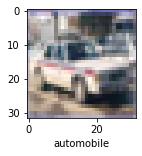

In [26]:
plot(X_train,y_train,65)

In [27]:
## Normalization
X_train=X_train/255
X_test=X_test/255

In [28]:
## Testing Artificial neural network 
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
batch_size = 32
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 106s 67ms/step - loss: 1.8145 - accuracy: 0.3506 - val_loss: 1.6616 - val_accuracy: 0.4125
Epoch 2/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.6208 - accuracy: 0.4277 - val_loss: 1.6783 - val_accuracy: 0.3914
Epoch 3/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.5416 - accuracy: 0.4564 - val_loss: 1.6310 - val_accuracy: 0.4136
Epoch 4/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.4804 - accuracy: 0.4770 - val_loss: 1.4960 - val_accuracy: 0.4655
Epoch 5/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.4304 - accuracy: 0.4979 - val_loss: 1.4479 - val_accuracy: 0.4853
Epoch 6/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.3886 - accuracy: 0.5125 - val_loss: 1.5152 - val_accuracy: 0.4659
Epoch 7/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.3509 - accuracy: 0.5243 - val_loss: 1.4578 

NameError: name 'x_test' is not defined

In [29]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 4s 12ms/step - loss: 1.4387 - accuracy: 0.4829
Test accuracy: 0.4828999936580658


In [30]:
## Classification Report
from sklearn.metrics import confusion_matrix ,classification_report
y_pred = model.predict(X_test)
y_pred_classes=[np.argmax(element)for element in y_pred]
print('Classification Report: \n',classification_report(y_test,y_pred_classes))

313/313 [==============================] - 4s 11ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.62      0.58      1000
           1       0.70      0.60      0.64      1000
           2       0.40      0.34      0.37      1000
           3       0.37      0.30      0.33      1000
           4       0.62      0.16      0.26      1000
           5       0.57      0.19      0.29      1000
           6       0.30      0.90      0.45      1000
           7       0.74      0.45      0.56      1000
           8       0.61      0.67      0.64      1000
           9       0.57      0.59      0.58      1000

    accuracy                           0.48     10000
   macro avg       0.54      0.48      0.47     10000
weighted avg       0.54      0.48      0.47     10000



In [32]:
## Testing Convolution Neural Network
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation ='relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation ='relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation ='relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
# Compile the model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
cnn.fit(X_train, y_train, epochs=epochs,)


Epoch 1/5
1563/1563 [==============================] - 29s 18ms/step - loss: 1.6233 - accuracy: 0.4024
Epoch 2/5
1563/1563 [==============================] - 28s 18ms/step - loss: 1.2892 - accuracy: 0.5396
Epoch 3/5
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1611 - accuracy: 0.5904
Epoch 4/5
1563/1563 [==============================] - 29s 18ms/step - loss: 1.0817 - accuracy: 0.6206
Epoch 5/5
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0240 - accuracy: 0.6429


In [33]:
# Evaluate the model
test_loss, test_accuracy = cnn.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 2s 7ms/step - loss: 1.0357 - accuracy: 0.6321
Test accuracy: 0.632099986076355


In [34]:
y_pred = cnn.predict(X_test)
y_pred_classes=[np.argmax(element)for element in y_pred]
print('Classification Report: \n',classification_report(y_test,y_pred_classes))

313/313 [==============================] - 2s 6ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.64      0.68      1000
           1       0.68      0.84      0.75      1000
           2       0.58      0.42      0.49      1000
           3       0.44      0.47      0.45      1000
           4       0.65      0.44      0.53      1000
           5       0.51      0.56      0.54      1000
           6       0.73      0.70      0.71      1000
           7       0.61      0.75      0.67      1000
           8       0.69      0.81      0.74      1000
           9       0.74      0.70      0.72      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



In [42]:
y_test = y_test.reshape(-1,)

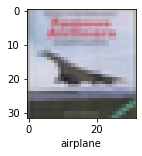

In [52]:
plot(X_test,y_test,3)

In [46]:
y_pred[:5]

array([[1.9811541e-02, 3.1709573e-03, 1.9066587e-02, 6.5218419e-01,
        1.4020774e-02, 1.9194950e-01, 2.4755223e-02, 1.4111152e-02,
        5.6409981e-02, 4.5201336e-03],
       [1.3249055e-01, 6.1565578e-01, 7.1391303e-05, 4.9951363e-05,
        2.2938686e-05, 8.9794239e-06, 4.2221191e-06, 2.5894809e-05,
        2.2631826e-01, 2.5352092e-02],
       [1.3433711e-01, 3.2695651e-01, 1.9722693e-03, 4.4841231e-03,
        1.2634770e-03, 6.4437574e-04, 4.8982358e-04, 4.8590237e-03,
        3.2213381e-01, 2.0285945e-01],
       [5.0574505e-01, 7.5633429e-02, 9.2749419e-03, 2.5429353e-03,
        2.8081904e-03, 2.5352856e-04, 4.1516180e-04, 1.9748131e-04,
        3.9886808e-01, 4.2611989e-03],
       [2.3690173e-03, 6.9500849e-04, 7.0130058e-02, 9.0746798e-02,
        4.2650914e-01, 2.5466785e-02, 3.7941429e-01, 3.2714580e-03,
        1.1424916e-03, 2.5501428e-04]], dtype=float32)

In [50]:
y_classes[:10]

[3, 1, 1, 0, 4, 6, 1, 6, 3, 1]

In [49]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [51]:
classes[y_classes[3]]

'airplane'

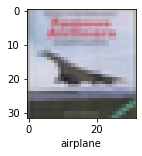

In [53]:
plot(X_test,y_test,3)